# Analysis of customer churn in PowerCo

##### One of the key hypotheses: Exploring is the effect of price changes on customer churn.
<br/>
<br/>
To better understand the contribution of various factors to a customer's possible action, the following data sources could be used:
<br/>
1. Customer demographics
<br/>
2. Previous transaction and pricing data
<br/>
3. Customer feedback
<br/>
4. PowerCo product and service details
<br/>
5. Customer complaints and their handling data
<br/>
6. Competitor pricing and service details.
<br/>
<br/>
To gain more insights into customer churn behavior, we could perform:
<br/>
1. Price sensitivity analysis: Analyze pricing data over time to identify patterns and trends that may be driving customer churn.
<br/>
2. Customer segmentation analysis: Segment customers based on their demographics, usage patterns, and other characteristics to identify which groups are most likely to switch providers. By understanding the unique characteristics of each segment, we can develop targeted marketing strategies to retain customers.
<br/>
3. Service quality analysis: Analyze customer service data, such as call logs and chat transcripts, to identify patterns and trends in customer complaints and service requests. This will help us understand the root causes of customer service issues and develop strategies to improve service quality and customer satisfaction.
<br/>
4. Competitor analysis: Analyze data on competitor pricing and services to identify how PowerCo's pricing and services compare to those of its competitors. This will help us develop strategies to remain competitive and retain customers.

### Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kstest
from scipy.stats import ttest_ind
from sklearn.metrics import confusion_matrix

In [11]:
df_client = pd.read_csv("client_data.csv")
df_price = pd.read_csv("price_data.csv")

In [13]:
df_client.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [23]:
df_client['churn'].value_counts()/ len(df_client) * 100

0    90.284814
1     9.715186
Name: churn, dtype: float64

##### There is nearly 9.7% of churning in the next 3 months

In [25]:
df_client.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [60]:
df_client.isna().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

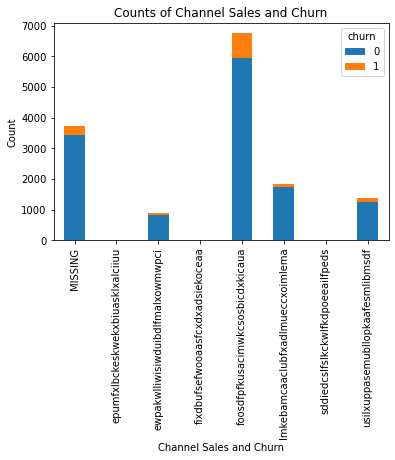

In [57]:
fig, ax = plt.subplots(figsize=(6, 4))
df_client.groupby(['channel_sales', 'churn'])['id'].count().unstack().plot(kind='bar', ax=ax,stacked=True)

ax.set_xlabel('Channel Sales and Churn')
ax.set_ylabel('Count')
ax.set_title('Counts of Channel Sales and Churn')

plt.show()

In [54]:
df_client.groupby(['churn'])[['cons_12m','cons_gas_12m','cons_last_month','pow_max']].mean()

,cons_12m,cons_gas_12m,cons_last_month,pow_max
churn,,,,
0,167867.266550,30121.497308,17046.352089,18.000339
1,78862.478506,9235.411557,7205.239605,19.387827


##### The mean consumption of gas and power who are churning were lower.
##### Very Small Consumers Might be Leaving

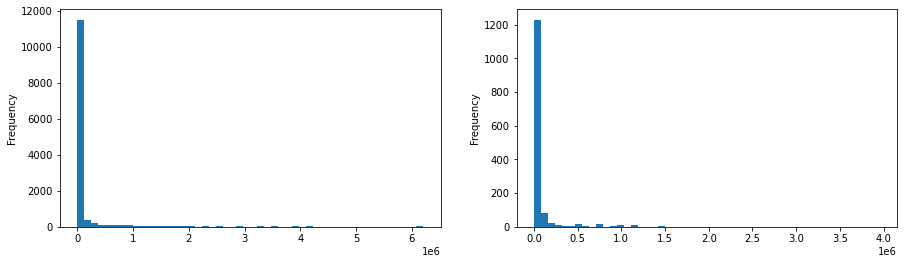

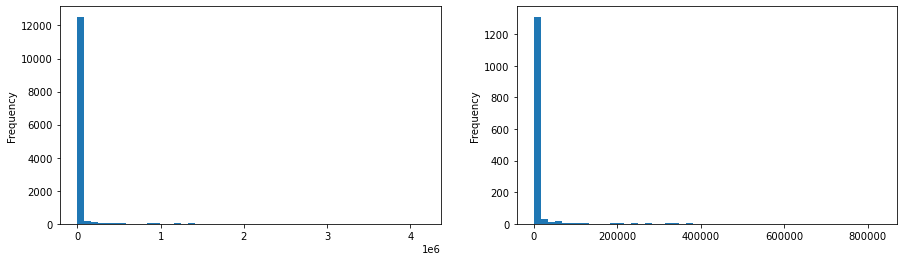

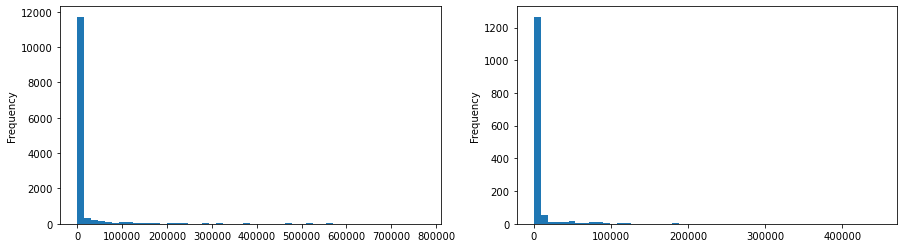

In [53]:
for i in ['cons_12m','cons_gas_12m','cons_last_month']:
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 4))
    df_client[df_client['churn']==0][i].plot(kind='hist', bins=50, ax=ax1)
    df_client[df_client['churn']==1][i].plot(kind='hist', bins=50, ax=ax2)

#### There is not much of clear distinction based on power consumption, We might just say that the highest power consumptions might not churn

In [55]:
df_client.groupby(['churn'])[['forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak']].mean()

,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
churn,,,,,,,
0,1858.473333,1402.487601,0.938197,62.126588,0.137371,0.050019,43.108310
1,1962.861938,1374.441860,1.231853,72.010937,0.136470,0.054873,43.332143


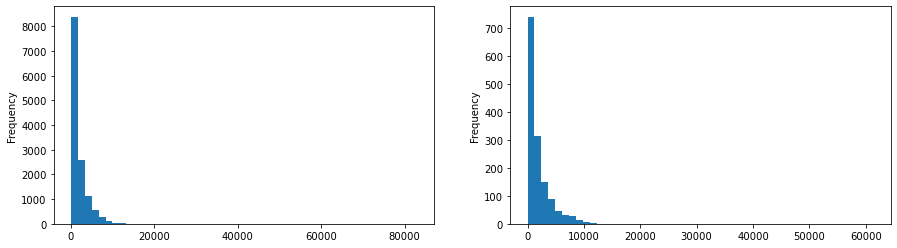

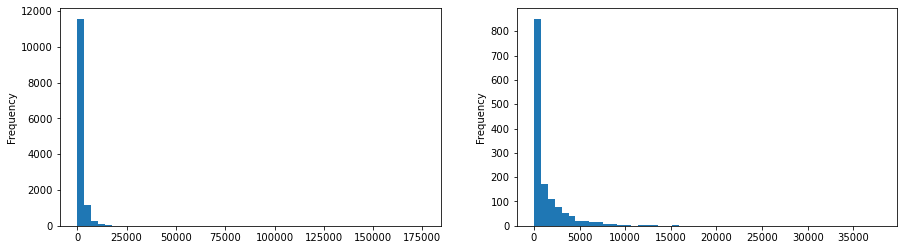

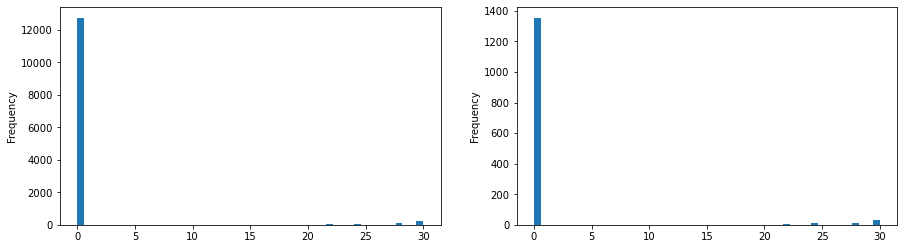

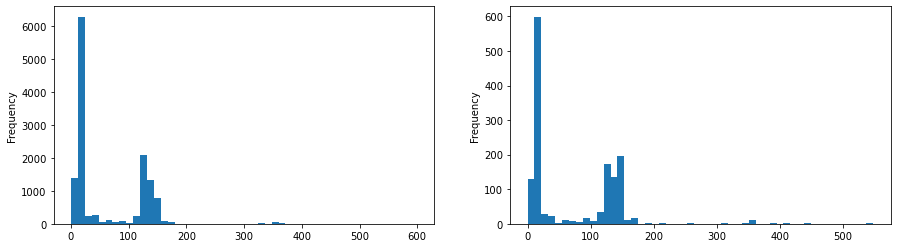

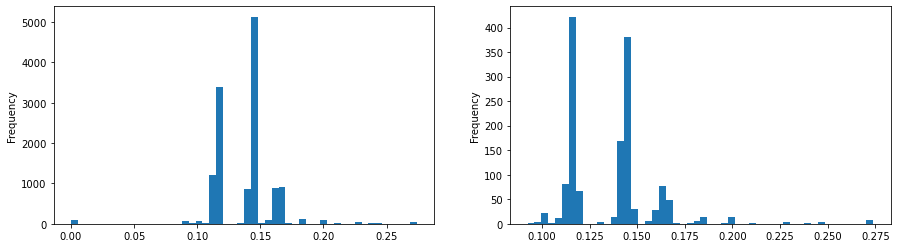

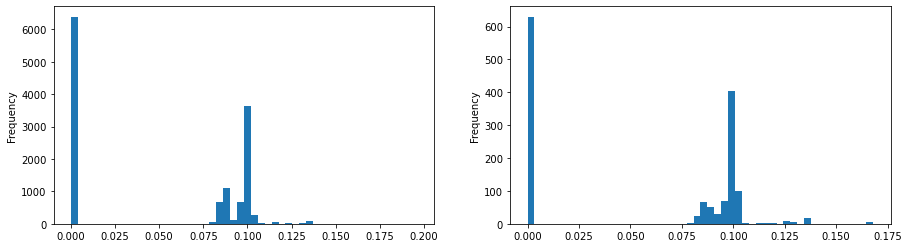

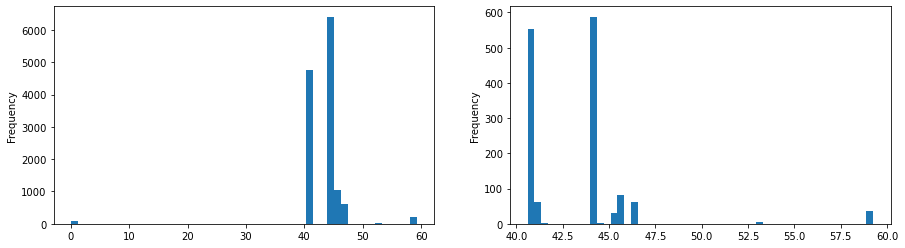

In [56]:
for i in ['forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak']:
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 4))
    df_client[df_client['churn']==0][i].plot(kind='hist', bins=50, ax=ax1)
    df_client[df_client['churn']==1][i].plot(kind='hist', bins=50, ax=ax2)

In [72]:
df_client.groupby(['churn','origin_up'])['id'].count()

churn  origin_up                       
0      MISSING                               60
       ewxeelcelemmiwuafmddpobolfuxioce       1
       kamkkxfxxuwbdslkwifmmcsiusiuosws    4036
       ldkssxwpmemidmecebumciepifcamkci    2884
       lxidpiddsbxsbosboudacockeimpuepw    6204
       usapbepcfoloekilkwsdiboslwaxobdp       2
1      MISSING                                4
       kamkkxfxxuwbdslkwifmmcsiusiuosws     258
       ldkssxwpmemidmecebumciepifcamkci     264
       lxidpiddsbxsbosboudacockeimpuepw     893
Name: id, dtype: int64

In [64]:
df_client.groupby(['churn'])['num_years_antig'].mean()

churn
0    5.037006
1    4.633545
Name: num_years_antig, dtype: float64

<AxesSubplot:ylabel='Frequency'>

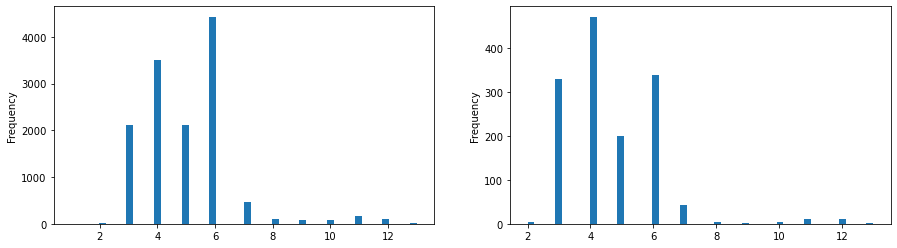

In [66]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 4))
df_client[df_client['churn']==0]['num_years_antig'].plot(kind='hist', bins=50, ax=ax1)
df_client[df_client['churn']==1]['num_years_antig'].plot(kind='hist', bins=50, ax=ax2)

##### Relatively newer customers are churning

In [67]:
df_client.groupby(['churn'])[['margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin']].mean()

,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin
churn,,,,
0,23.929863,23.926979,1.295822,185.057407
1,30.468682,30.468682,1.260042,228.361938


##### As the margins are bit higher compared to the products used for the churning customers we could say that the churned customers are priced higher

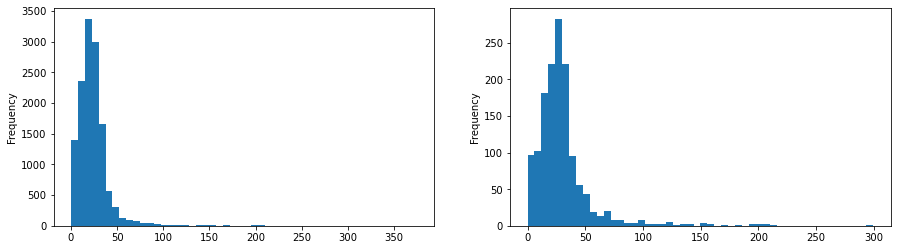

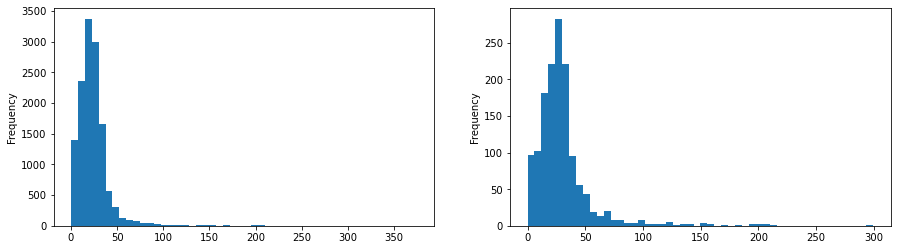

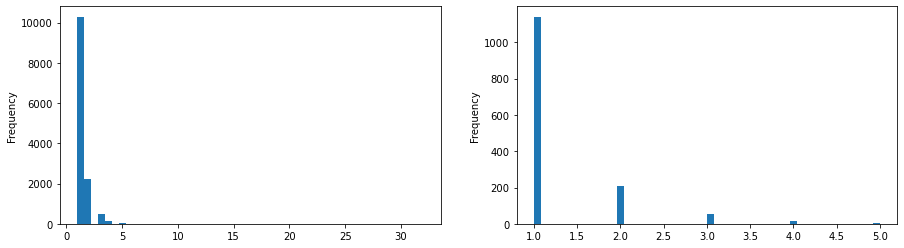

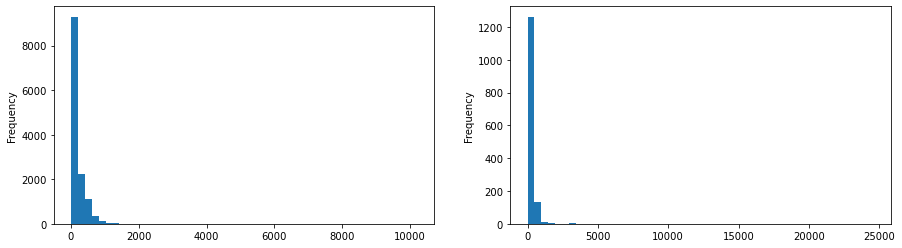

In [62]:
for i in ['margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin']:
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 4))
    df_client[df_client['churn']==0][i].plot(kind='hist', bins=50, ax=ax1)
    df_client[df_client['churn']==1][i].plot(kind='hist', bins=50, ax=ax2)

In [74]:
df_price.isna().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

In [78]:
df_price.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

In [80]:
churn_ids = df_client[df_client['churn']==1]['id'].to_list()
retained_ids =  df_client[df_client['churn']==0]['id'].to_list()
df_price['churned']=df_price['id'].apply(lambda x: 1 if x in churn_ids else 0)

In [85]:
df_price.groupby(['churned'])[['price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix']].mean()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
churned,,,,,,
0,0.140943,0.054445,0.030221,43.350991,10.567833,6.337841
1,0.141898,0.056554,0.033343,43.163536,11.192617,7.156747


#### There is clear price difference between the churned and retained customers
#### Lets see if the difference is statistically significant

### Hypothesis: Price has the impact on customers 
#### Null Hypothesis: Mean price of the customers churned and retained are same
#### Alternate Hypothesis: Mean price of the customers churned and reatined are different

##### significance value would be 0.1

#### Assumptions: 
1. Fixed and Variable price sum have same effect on customers
2. Price over the last 12 months had same effect on customers

Above assumptions to reduce the number of tests

In [93]:
df_hyp = df_price.groupby(['id','churned'])[['price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix']].mean().reset_index()

In [95]:
df_hyp['price_off_peak'] = df_hyp['price_off_peak_var'] +df_hyp['price_off_peak_fix']
df_hyp['price_peak'] = df_hyp['price_peak_var'] +df_hyp['price_peak_fix']
df_hyp['price_mid_peak'] = df_hyp['price_mid_peak_var'] +df_hyp['price_mid_peak_var']

### Normality Test

In [114]:
for i in ['price_off_peak', 'price_peak', 'price_mid_peak']:
    statistic, p_value = kstest(df_hyp[df_hyp['churned']==0][i], 'norm')
    print('p-value for {}:{:.2e}'.format(i, p_value))

p-value for price_off_peak:0.00e+00
p-value for price_peak:0.00e+00
p-value for price_mid_peak:0.00e+00


In [115]:
for i in ['price_off_peak', 'price_peak', 'price_mid_peak']:
    statistic, p_value = kstest(df_hyp[df_hyp['churned']==1][i], 'norm')
    print('p-value for {}:{:.2e}'.format(i, p_value))

p-value for price_off_peak:0.00e+00
p-value for price_peak:0.00e+00
p-value for price_mid_peak:0.00e+00


In [124]:
for i in ['price_off_peak', 'price_peak', 'price_mid_peak']:
    statistic, p_value = kstest(df_hyp[i], 'norm')
    print('p-value for {}:{:.2e}'.format(i, p_value))

p-value for price_off_peak:0.00e+00
p-value for price_peak:0.00e+00
p-value for price_mid_peak:0.00e+00


#### Although the plots and tests are contradicting, for simplicity lets assume they are in normality

In [127]:
for i in ['price_off_peak', 'price_peak', 'price_mid_peak']:
    t_statistic, p_value = ttest_ind(df_hyp[df_hyp['churned']==1][i], df_hyp[df_hyp['churned']==0][i])
    print('p-value for {}:{}'.format(i, p_value))

p-value for price_off_peak:0.20506921242178672
p-value for price_peak:0.07727773540125923
p-value for price_mid_peak:0.0017800669300907825


#### At significance value of 0.1 we could reject the null hypothesis that the mean prices of peak and mid peak for customers who are churned and retained